In [285]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import os
import array


import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.time import Time
from scipy import signal
from numpy.random import random_sample

In [2]:
def size2n(array, direction='up'):
    if direction not in ['up', 'down']:
        raise ValueError( '"{}"'.format(direction)
                         + ' is not possible argument for the function. Use "up" or "down"')
    elif len(array) == 0:
        raise ValueError("The array cannot be empty. len(array) = 0")
    else:
        pass
    
    obs_points = len(array)
    if obs_points & (obs_points - 1):
        x = bin(obs_points)
        if direction == 'up':
            x_high = '0b1' + '0'*(len(x[2:]))
            add_points = int(x_high, 2) - obs_points
            return np.hstack([array, np.zeros(add_points)])
        else:
            x_low = '0b1' + '0'*(len(x[3:]))
            add_points = obs_points - int(x_low, 2)
            return array[:-add_points]
    else:
        return array

0.8333333333333334


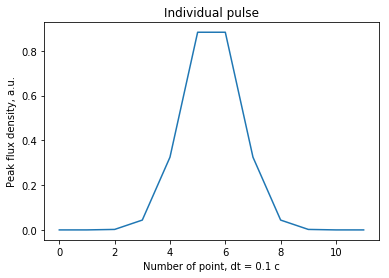

In [18]:
period_s = 1.2 # Период исскуственного пульсара
demen = 10e0
pulse = signal.gaussian(period_s*demen, std=1, sym=True)
plt.close()
plt.title('Individual pulse')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.plot(pulse)
print(1/period_s)

In [184]:
ampl_noise = 0.1
len_noise_left = 1
len_noise_right = 1
idx = 1
obser = []
for i in range(10):
    obser.append([])
    for j in range(200):
        obser[i].extend(random_sample(1)*pulse + np.random.normal(0, ampl_noise, len(pulse)))

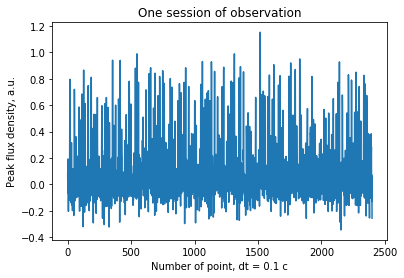

In [185]:
plt.close()
plt.plot(obser[idx])
plt.title('One session of observation')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.show()

In [49]:
# Звездные сутки 86164,090530833 с или 861641 точек между двумя точками в звездных сутками
# Размер массива точек 861641 - 200 = 861441

In [169]:
joined_array_zero = np.hstack([obser[0], np.zeros(861441), 
                               obser[1], np.zeros(861441),
                               obser[2], np.zeros(861441),
                               obser[3], np.zeros(861441),
                               obser[4], np.zeros(861441)
                              ])
#joined_array_full = np.hstack([i for i in obser[:3]])

In [148]:
print(len(joined_array_zero))

4319205


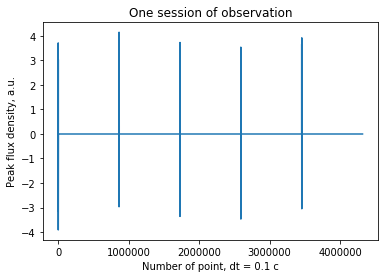

In [186]:
plt.close()
plt.plot(joined_array_zero)
plt.title('One session of observation')
plt.ylabel('Peak flux density, a.u.')
plt.xlabel('Number of point, dt = ' + str(1/demen) + ' c')
plt.show()

In [187]:
fs = demen # частотота дискретизации временных рядов 
noised_obser = size2n(noised_obser, 'up')
f, Pxx_den = signal.periodogram(noised_obser, fs)

*** Оригинальный массив ***
Основная гармоника:  5.9604644775390625e-06
Неточность определения:  0.8333273728688558
Размер массива:  4319205
Отношение к периоду:  3599337.5
*** Увеличенный массив ***
Основная гармоника:  1.1920928955078125e-05
Неточность определения:  0.8333214124043783
Размер массива:  8388608
Отношение к периоду:  6990506.666666667


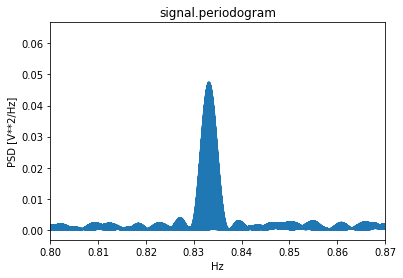

In [189]:
plt.plot(f, Pxx_den)
plt.title('signal.periodogram')
plt.ylabel('PSD [V**2/Hz]')
plt.xlabel('Hz')
# plt.axhline(0.3*max(Pxx_den))
# plt.ylim(0, 0.00003)
plt.xlim(0.8, 0.87)
plt.show()

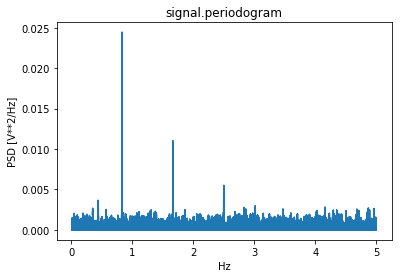

In [192]:
tres = 10000
plt.plot(f[tres:],Pxx_den[tres:])
plt.title('signal.periodogram')
plt.ylabel('PSD [V**2/Hz]')
plt.xlabel('Hz')
# plt.axhline(0.3*max(Pxx_den))
# plt.ylim(0, 0.00003)
#plt.xlim(0.8, 0.87)
plt.show()

In [174]:
f_tresed = f[tres:]
Pxx_den_tresed = Pxx_den[tres:]

In [193]:
peaks_origin, _ = signal.find_peaks(Pxx_den_tresed, height=0.996*max(Pxx_den_tresed))
true_harm = 1/period_s
main_harm = f_tresed[peaks_origin][0]
for i in f_tresed[peaks_origin][:]:
    print(j ,i, i/main_harm, i/true_harm,)

0 0.8330583572387695 1.0 0.9996700286865234 2.4419945377080796
1 0.8331394195556641 1.0000973068887553 0.9997673034667969 2.444762596576247
2 0.8332204818725586 1.0001946137775106 0.9998645782470703 2.4386476454221273
3 0.8332550525665283 1.0002361123035974 0.999906063079834 2.4390282340568117
4 0.8333361148834229 1.0003334191923527 1.0000033378601074 2.435461460865631
